In [30]:
SVM (Support Vector Machines) — это алгоритм машинного обучения, используемый для решения задач классификации, который строит гиперплоскость 
в n-мерном пространстве для разделения объектов двух или более классов. Гиперплоскость выбирается таким образом, чтобы максимизировать расстояние 
между гиперплоскостью и ближайшими объектами разных классов (зазор). Объекты, которые расположены ближе всего к гиперплоскости, называются опорными 
векторами.

In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
digits = datasets.load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
X= digits.data
y= digits.target
print(digits.data.shape)
df

(1797, 64)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

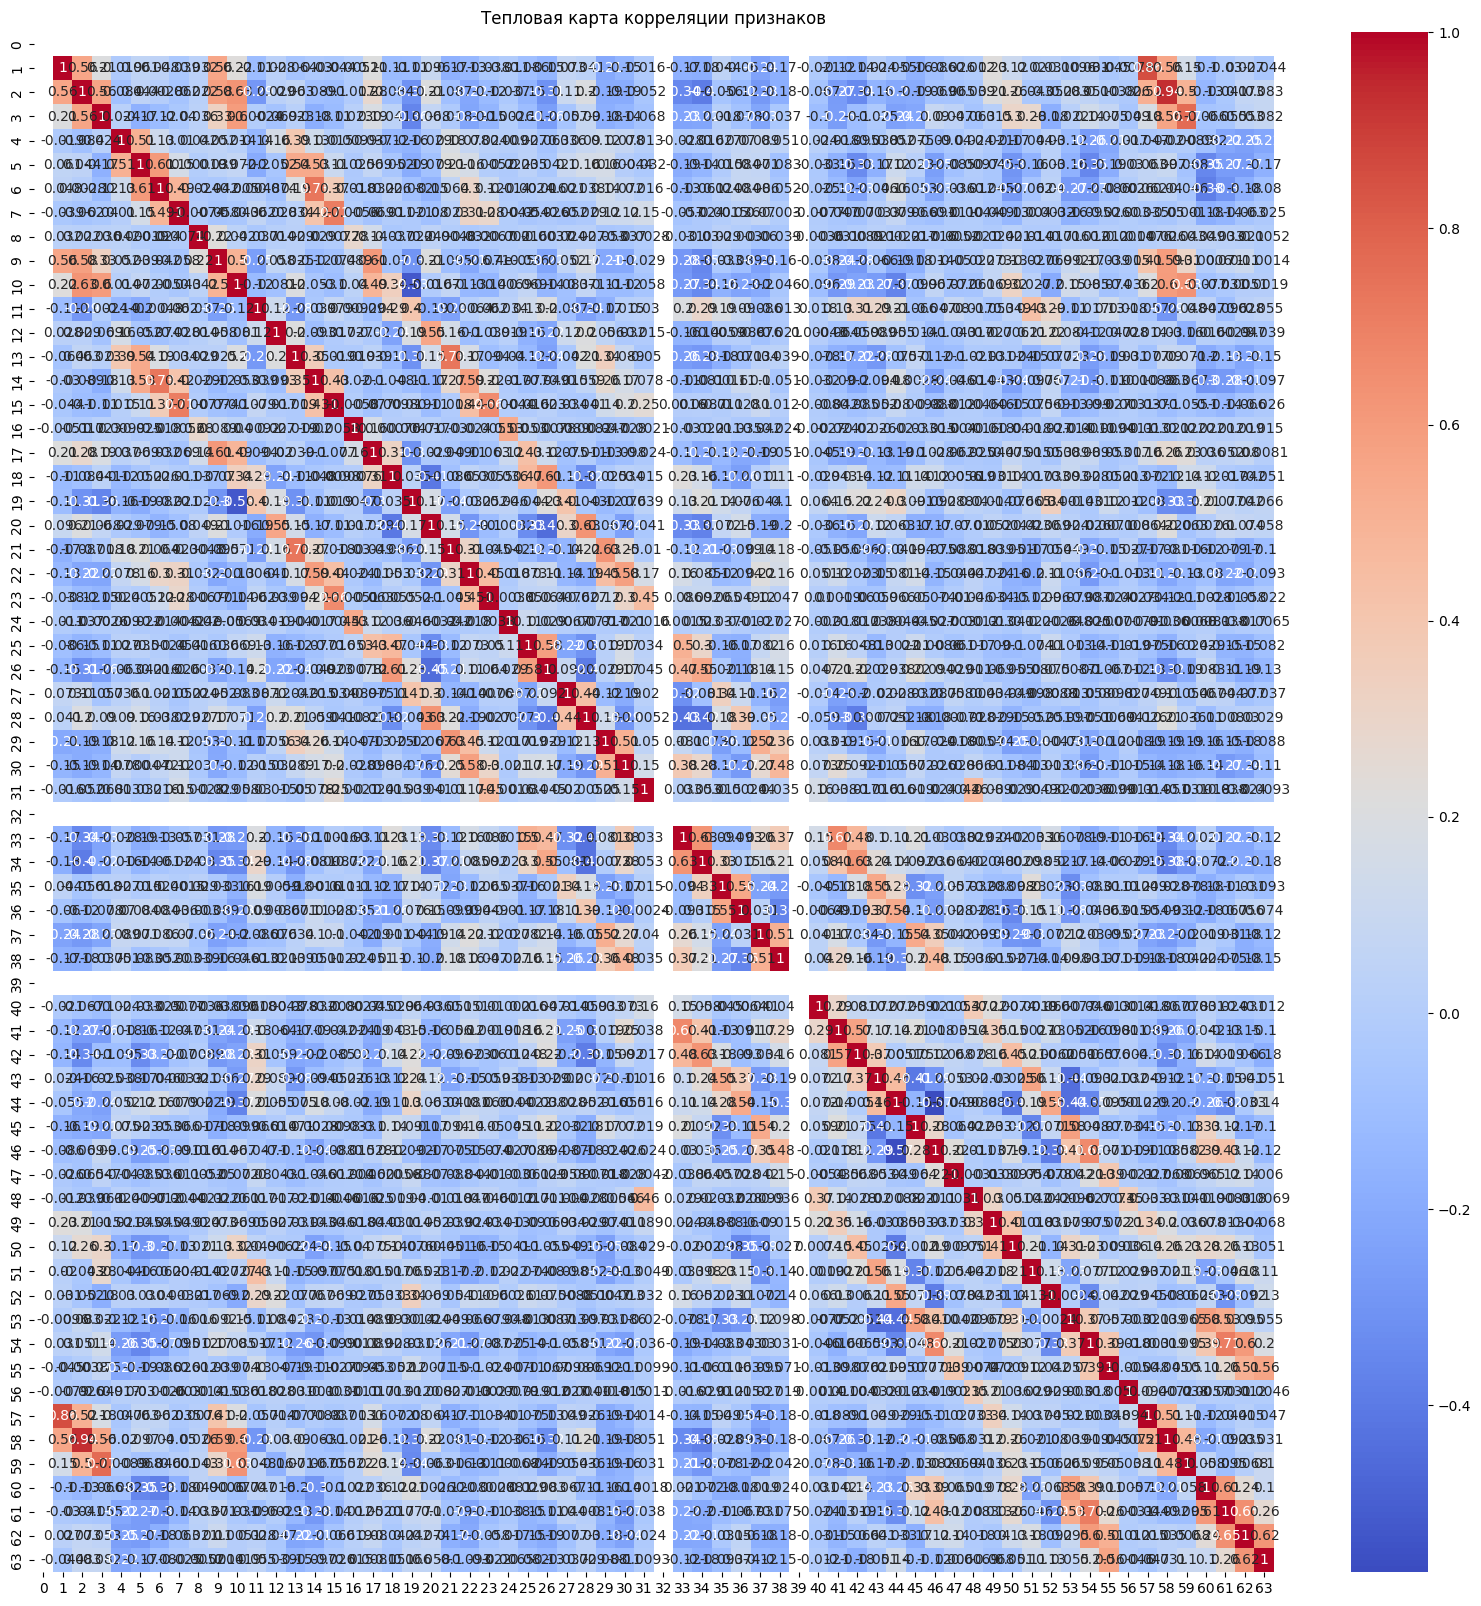

In [34]:
plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляции признаков")
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [36]:
svm_model = SVC(kernel='rbf', C=1.0, random_state=123)
svm_model.fit(X_train, y_train)

SVC(random_state=123)

In [37]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9861111111111112


In [38]:
svm_model_01 = SVC(kernel='rbf', C=0.1, random_state=123)
svm_model_01.fit(X_train, y_train)

SVC(C=0.1, random_state=123)

In [39]:
y_pred = svm_model_01.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9472222222222222


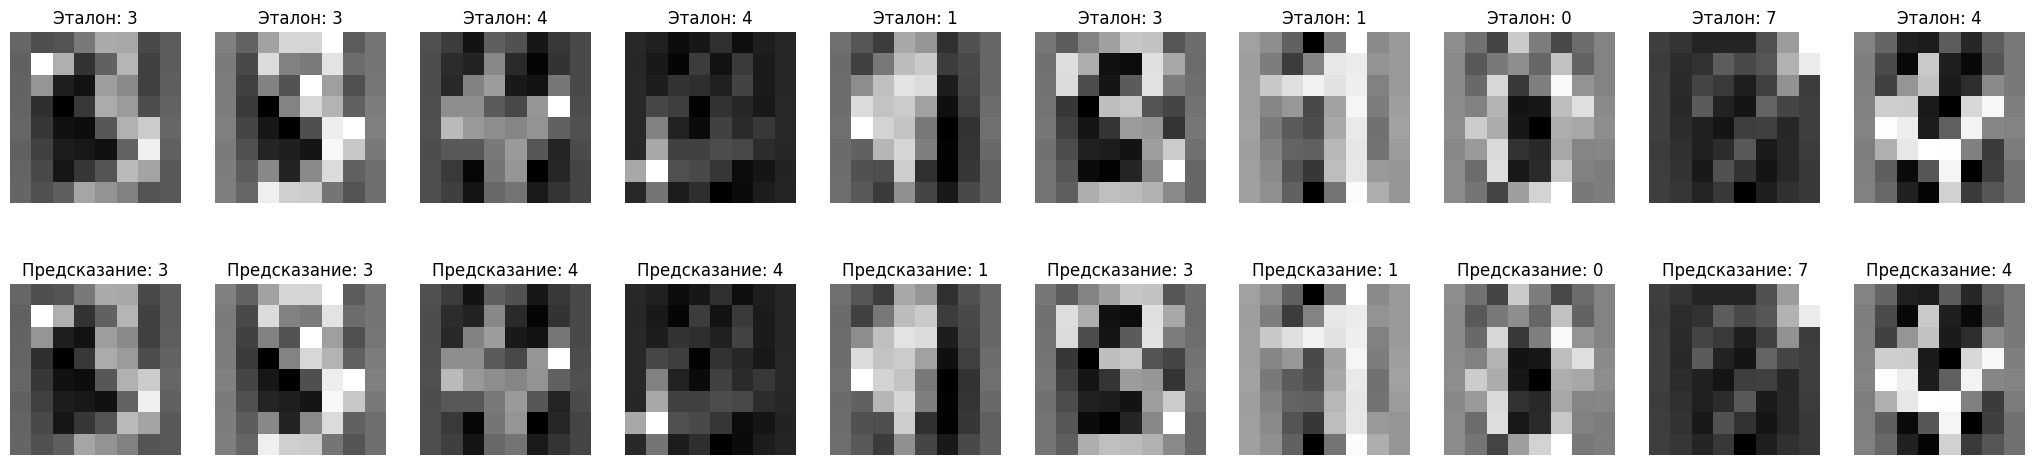

In [40]:
n_samples = 10
sample_images = X_test[:n_samples]
sample_targets = y_test[:n_samples]
predicted_targets = y_pred[:n_samples]


plt.figure(figsize=(26, 6))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(sample_images[i].reshape((8, 8)), cmap=plt.cm.gray)
    plt.title(f'Эталон: {sample_targets[i]}')
    plt.axis('off')
    
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(sample_images[i].reshape((8, 8)), cmap=plt.cm.gray)
    plt.title(f'Предсказание: {predicted_targets[i]}')
    plt.axis('off')

plt.show()